## Prep

In [2]:
import csv
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, BatchNormalization, Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.datasets import cifar10
from sklearn import datasets
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn
from sklearn.metrics import confusion_matrix
import time
 


## Read Data

In [3]:
letters=["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z"]
directories=["dataset1", "dataset2"]
#letters=["a0", "a1", "a2", "a3", "a4"]
#directories=["disease_dataset", "disease_dataset2"]

data=[]
label=[]



for dir in directories:
    for i in letters:
        cur_data=pd.read_csv('/Users/jx/Desktop/Col/ISEF/isef_new_program/my_dataset/'+dir+'/'+i+'.csv')
        number_index=letters.index(i)
        for se in cur_data.values:
            data.append(se)
            label.append(number_index)


x=data
y=label
x_train,x_test,y_train,y_test = train_test_split(np.array(x).reshape(-1,63,1),y,test_size=0.1)
labels = to_categorical(y_train)



## Model A

In [4]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=5, strides=1, activation='relu'))
model.add(Conv1D(filters=32, kernel_size=2, strides=1, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=26, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

2022-02-24 21:20:45.449178: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
#Training

history = model.fit(x_train, labels, epochs=10, batch_size=64, validation_split=0.1)

y_cat_test= to_categorical(y_test)

loss_and_metrics = model.evaluate(x_test, y_cat_test)

model.summary()

#model.save("model_1.h5")

print(loss_and_metrics)

Epoch 1/10
384/384 [==============================] - 4s 9ms/step - loss: 0.5655 - accuracy: 0.8528 - val_loss: 0.6684 - val_accuracy: 0.9802
Epoch 2/10
384/384 [==============================] - 3s 8ms/step - loss: 0.0611 - accuracy: 0.9853 - val_loss: 0.0377 - val_accuracy: 0.9938
Epoch 3/10
384/384 [==============================] - 3s 7ms/step - loss: 0.0283 - accuracy: 0.9940 - val_loss: 0.0423 - val_accuracy: 0.9857
Epoch 4/10
384/384 [==============================] - 3s 7ms/step - loss: 0.0139 - accuracy: 0.9971 - val_loss: 0.0140 - val_accuracy: 0.9974
Epoch 5/10
384/384 [==============================] - 3s 9ms/step - loss: 0.0134 - accuracy: 0.9969 - val_loss: 0.0131 - val_accuracy: 0.9978
Epoch 6/10
384/384 [==============================] - 4s 10ms/step - loss: 0.0067 - accuracy: 0.9986 - val_loss: 0.0084 - val_accuracy: 0.9985
Epoch 7/10
384/384 [==============================] - 3s 7ms/step - loss: 0.0125 - accuracy: 0.9969 - val_loss: 0.0045 - val_accuracy: 0.9989
Epoch

## Model B

In [40]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=5, strides=1, activation='relu'))
model.add(Conv1D(filters=32, kernel_size=2, strides=1, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=26, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
#Training

history = model.fit(x_train, labels, epochs=10, batch_size=64, validation_split=0.1)

y_cat_test= to_categorical(y_test)

loss_and_metrics = model.evaluate(x_test, y_cat_test)

model.summary()

#model.save("model_1.h5")

print(loss_and_metrics)

Epoch 1/10
384/384 [==============================] - 4s 8ms/step - loss: 0.7032 - accuracy: 0.7961 - val_loss: 0.8352 - val_accuracy: 0.9769
Epoch 2/10
384/384 [==============================] - 3s 7ms/step - loss: 0.1105 - accuracy: 0.9684 - val_loss: 0.0446 - val_accuracy: 0.9934
Epoch 3/10
384/384 [==============================] - 3s 7ms/step - loss: 0.0549 - accuracy: 0.9845 - val_loss: 0.0302 - val_accuracy: 0.9927
Epoch 4/10
384/384 [==============================] - 3s 7ms/step - loss: 0.0334 - accuracy: 0.9916 - val_loss: 0.0128 - val_accuracy: 0.9971
Epoch 5/10
384/384 [==============================] - 3s 7ms/step - loss: 0.0233 - accuracy: 0.9945 - val_loss: 0.0173 - val_accuracy: 0.9971
Epoch 6/10
384/384 [==============================] - 3s 7ms/step - loss: 0.0203 - accuracy: 0.9942 - val_loss: 0.0064 - val_accuracy: 0.9989
Epoch 7/10
384/384 [==============================] - 3s 7ms/step - loss: 0.0167 - accuracy: 0.9959 - val_loss: 0.0076 - val_accuracy: 0.9982
Epoch 

## Model C

In [45]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=5, strides=1, activation='relu'))
model.add(Conv1D(filters=32, kernel_size=2, strides=1, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=16, kernel_size=4, strides=1, activation='relu'))
model.add(Conv1D(filters=16, kernel_size=2, strides=1, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=26, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [47]:
#Training

history = model.fit(x_train, labels, epochs=10, batch_size=64, validation_split=0.1)

y_cat_test= to_categorical(y_test)

loss_and_metrics = model.evaluate(x_test, y_cat_test)

model.summary()

#model.save("model_1.h5")

print(loss_and_metrics)

Epoch 1/10
384/384 [==============================] - 6s 12ms/step - loss: 0.5648 - accuracy: 0.8455 - val_loss: 2.6679 - val_accuracy: 0.2547
Epoch 2/10
384/384 [==============================] - 4s 11ms/step - loss: 0.0495 - accuracy: 0.9882 - val_loss: 0.0193 - val_accuracy: 0.9963
Epoch 3/10
384/384 [==============================] - 4s 10ms/step - loss: 0.0203 - accuracy: 0.9954 - val_loss: 0.0306 - val_accuracy: 0.9919
Epoch 4/10
384/384 [==============================] - 4s 10ms/step - loss: 0.0149 - accuracy: 0.9967 - val_loss: 0.0434 - val_accuracy: 0.9879
Epoch 5/10
384/384 [==============================] - 4s 10ms/step - loss: 0.0129 - accuracy: 0.9965 - val_loss: 0.0052 - val_accuracy: 0.9985
Epoch 6/10
384/384 [==============================] - 4s 10ms/step - loss: 0.0084 - accuracy: 0.9976 - val_loss: 0.0090 - val_accuracy: 0.9982
Epoch 7/10
384/384 [==============================] - 4s 10ms/step - loss: 0.0102 - accuracy: 0.9974 - val_loss: 0.3788 - val_accuracy: 0.8807

In [36]:
#model.save("disease_model_.h5")

## Model D

In [68]:


model = Sequential()

model.add(Dense(units=64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=26, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [69]:
#Training
x_train_temp=x_train.reshape(-1,63)
x_test_temp=x_test.reshape(-1,63)

history = model.fit(x_train_temp, labels, epochs=10, batch_size=64, validation_split=0.1)

y_cat_test= to_categorical(y_test)

loss_and_metrics = model.evaluate(x_test_temp, y_cat_test)

model.summary()

#model.save("model_1.h5")

print(loss_and_metrics)

Epoch 1/10
384/384 [==============================] - 1s 2ms/step - loss: 2.9184 - accuracy: 0.2450 - val_loss: 2.4360 - val_accuracy: 0.5420
Epoch 2/10
384/384 [==============================] - 1s 1ms/step - loss: 2.0072 - accuracy: 0.5506 - val_loss: 1.5914 - val_accuracy: 0.7240
Epoch 3/10
384/384 [==============================] - 0s 1ms/step - loss: 1.3896 - accuracy: 0.6892 - val_loss: 1.1427 - val_accuracy: 0.7794
Epoch 4/10
384/384 [==============================] - 1s 2ms/step - loss: 1.0606 - accuracy: 0.7586 - val_loss: 0.8943 - val_accuracy: 0.8172
Epoch 5/10
384/384 [==============================] - 0s 1ms/step - loss: 0.8680 - accuracy: 0.7959 - val_loss: 0.7287 - val_accuracy: 0.8514
Epoch 6/10
384/384 [==============================] - 1s 2ms/step - loss: 0.7330 - accuracy: 0.8259 - val_loss: 0.6235 - val_accuracy: 0.8683
Epoch 7/10
384/384 [==============================] - 1s 1ms/step - loss: 0.6385 - accuracy: 0.8464 - val_loss: 0.5390 - val_accuracy: 0.8969
Epoch 

## Result Graphing

In [78]:
total_time=0
for i in range(1):
    start_time=time.time()
    model.predict(x_test)
    end_time=time.time()
    run_time_1=end_time-start_time

    start_time=time.time()
    model.predict(x_test)
    model.predict(x_test)
    end_time=time.time()
    run_time_2=end_time-start_time

    total_time+=(run_time_2-run_time_1)

print(total_time/1)




0.03870987892150879


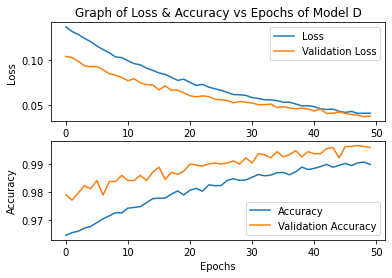

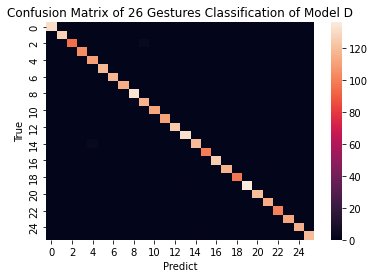

In [24]:

plt.subplot(2,1,1)
plt.title("Graph of Loss & Accuracy vs Epochs of Model D")
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["Loss", "Validation Loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.subplot(2,1,2)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["Accuracy", "Validation Accuracy"])
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.show()


y_predict=model.predict(x_test)

y_pred=[np.argmax(i) for i in y_predict]

cn=confusion_matrix(y_test, y_pred)

seaborn.heatmap(cn)
plt.xlabel("Predict")
plt.ylabel("True")
plt.title("Confusion Matrix of 26 Gestures Classification of Model D")
plt.show()